In [ ]:
# Steps
1. create a corpus - break down text to list of sentences

2. create a word_index.

3. tokenizer the data and create an n-gram sequences for each
sequence of the corpus

4.Pad the sequences

5. Segragate features from the sequences by reversing the last 
element of the arrays as labels

# Intro to Text Generation

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Step 1 : Create Corpus

In [2]:
data = "October arrived, spreading a damp chill over the grounds and  into the castle."

In [3]:
#instantiate tokenizer
tokenizer = Tokenizer()

#create the corpus by lower the letter and splitting the text
corpus = data.lower().split("\n")
print(corpus)

['october arrived, spreading a damp chill over the grounds and  into the castle.']


# Step 2: Train the tokenizer and create word encoding dictionary

In [4]:
tokenizer.fit_on_texts(corpus)

vocab_size = len(tokenizer.word_index) + 1


# Step 3: Create N-gram sequence

In [5]:
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0] #get all tokens of sequences
    for i in range(1, len(tokens)): #create n-gram sequences
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

In [6]:
# pad the sequences
max_seq_len = max(len(i) for i in input_sequences)
input_seq_array = np.array(pad_sequences(input_sequences,
                                        maxlen = max_seq_len,
                                        padding = 'pre')
                          )

# Step 4 : Extract features and Labels

In [8]:
#creating features(x) and label(y)
X = input_seq_array[:, : -1]
labels = input_seq_array[:, -1]

#one-hot encode the labels to get Y
y = tf.keras.utils.to_categorical(labels, num_classes = vocab_size)


In [13]:
# Create LSTM model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length = max_seq_len -1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(vocab_size, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X, y, epochs = 100, verbose = 1)

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 2.5652 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 2.5585 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 2.5519 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 998us/step - loss: 2.5453 - accuracy: 0.0833
Epoch 5/100
1/1 [==============================] - 0s 998us/step - loss: 2.5386 - accuracy: 0.1667
Epoch 6/100
1/1 [==============================] - 0s 998us/step - loss: 2.5319 - accuracy: 0.1667
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 2.5249 - accuracy: 0.1667
Epoch 8/100
1/1 [==============================] - 0s 996us/step - loss: 2.5177 - accuracy: 0.1667
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 2.5102 - accuracy: 0.1667
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 2.5023 - accuracy: 0.1667
Epoch 11/100

1/1 [==============================] - 0s 0s/step - loss: 0.8342 - accuracy: 0.9167
Epoch 85/100
1/1 [==============================] - 0s 999us/step - loss: 0.8185 - accuracy: 0.9167
Epoch 86/100
1/1 [==============================] - 0s 999us/step - loss: 0.8031 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.7879 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.7729 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7581 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7435 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.7290 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 996us/step - loss: 0.7147 - accuracy: 1.0000
Epoch 93/100
1/1 [==============================] - 0s 998us/step - loss: 0.7005 - accuracy: 1.0000
Epoch 94/100
1/1 [===========

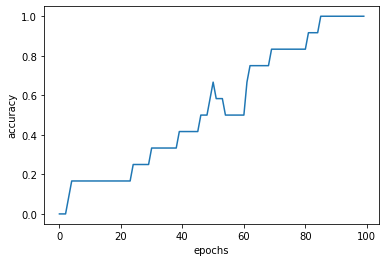

In [15]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("epochs")
    plt.ylabel(metric)
    plt.show

plot_metric(history, 'accuracy')

In [16]:
#Generate new Text

seed_text = "It was a cold night"

next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_seq_len -1, padding = 'pre')
    
    #predict the class using trained model
    predicted = model.predict_classes(token_list, verbose= 0)
    output = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output = word
            break
    seed_text += " " + output

print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
It was a cold night arrived spreading a chill over the grounds and into the castle castle castle castle castle castle castle the castle castle the castle castle castle castle the castle castle castle the castle castle castle the castle castle castle castle the castle castle castle the castle castle castle the castle castle castle castle the castle castle castle the castle castle castle the castle castle castle castle the castle castle castle the castle castle castle the castle castle castle castle the castle castle castle the castle castle castle the castle castle castle castle the castle castle castle the castle castle castle the castle


# Challenge: Generate Poetry